<h1 style="text-align: center; font-family: 'Times New Roman';">PERSONAL BANK LOAN ANALYSIS</h1>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
The objective of this classification problem is to identify potential customers who are more likely to take out a personal loan. The aim is to expand the bank's customer base of borrowers, thereby increasing loan-related business and revenue from interest. The goal is to develop a classifier that will assist the bank's management in identifying customers who are most likely to purchase a loan. By doing so, the bank can improve the success rate of loan offers and reduce the costs of marketing campaigns.
</p>


<h2 style="text-align: center; font-family: 'Times New Roman';">Import Libraries</h2>


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import shap
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from scipy.stats import pointbiserialr, spearmanr
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle
from sklearn.feature_selection import SequentialFeatureSelector
from lightgbm import LGBMClassifier

<h2 style="text-align: center; font-family: 'Times New Roman';">1. DATASET OVERVIEW</h2>


In [113]:
df = pd.read_csv("data/train_data.csv")
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Date,Constant column,Random column
0,409,60,36,89,91745,2,2/80,1.0,0,0,0,0,1,0,2023-06-03,100,0.299254
1,3738,44,19,30,91423,1,0/50,3.0,0,0,0,0,1,0,2023-07-31,100,0.311917
2,3890,26,0,19,93014,1,0/10,2.0,121,0,0,0,1,0,2023-08-03,100,0.819340
3,569,34,9,41,92101,2,0/10,1.0,161,0,0,0,1,1,2023-06-03,100,0.837241
4,1042,56,32,51,92780,4,1/50,1.0,0,0,0,0,0,0,2023-08-28,100,0.028088
5,1128,35,9,58,91101,1,2/50,1.0,0,0,0,0,1,1,2023-07-29,100,0.312930
6,3077,29,-1,62,92672,2,1/75,3.0,0,0,0,0,0,1,2023-06-14,100,0.245655
7,4617,66,41,114,92521,1,0/80,3.0,0,0,0,0,1,1,2023-08-26,100,0.517271
8,4989,34,8,85,95134,1,2/50,1.0,136,0,0,0,0,1,2023-06-02,100,0.271516
9,3578,39,9,32,91016,3,2/00,3.0,0,0,0,0,1,0,2023-06-11,100,0.651542


In [114]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Date,Constant column,Random column
3990,1050,35,10,23,94501,4,0/20,3.0,0,0,0,0,1,0,2023-06-29,100,0.340458
3991,1939,30,4,38,90245,1,1/90,3.0,0,0,0,0,1,0,2023-07-22,100,0.157107
3992,1411,60,35,44,92126,4,2/10,1.0,0,0,0,0,0,0,2023-05-18,100,0.127482
3993,1699,44,20,149,92121,1,1/70,1.0,0,0,0,0,1,0,2023-08-30,100,0.668936
3994,3684,53,27,62,95070,3,3/00,2.0,0,0,1,0,0,0,2023-05-20,100,0.499058
3995,4588,37,11,59,94720,4,0/20,3.0,0,0,0,0,0,0,2023-08-20,100,0.256714
3996,2342,36,10,91,92028,1,1/50,3.0,289,0,0,0,1,0,2023-05-08,100,0.602617
3997,1586,57,31,131,90502,2,2/70,1.0,0,0,0,0,0,0,2023-06-09,100,0.753401
3998,3153,40,15,83,90275,1,1/00,3.0,0,0,0,0,0,0,2023-06-11,100,0.921220
3999,4786,30,5,23,94304,2,0/90,3.0,0,0,1,0,1,0,2023-05-16,100,0.040968


<font face="Times New Roman" size="4">

---
### Variables description


<p style="font-family: 'Times New Roman'; font-size: 16px;">
<table border="1" cellpadding="10" cellspacing="0">
  <thead>
    <tr>
      <th><strong>Variable Name</strong></th>
      <th><strong>Description</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>ID</strong></td>
      <td>ID of the customer</td>
    </tr>
    <tr>
      <td><strong>Age</strong></td>
      <td>Age of the customer in completed years</td>
    </tr>
    <tr>
      <td><strong>Experience</strong></td>
      <td>Amount of work experience in years</td>
    </tr>
    <tr>
      <td><strong>Income</strong></td>
      <td>Amount of annual income (in thousands)</td>
    </tr>
    <tr>
      <td><strong>Zipcode</strong></td>
      <td>Postal code in which the client lives</td>
    </tr>
    <tr>
      <td><strong>Family</strong></td>
      <td>Number of family members</td>
    </tr>
    <tr>
      <td><strong>CCAvg</strong></td>
      <td>Average monthly spending with the credit card (in thousands)</td>
    </tr>
    <tr>
      <td><strong>Education</strong></td>
      <td>Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)</td>
    </tr>
    <tr>
      <td><strong>Mortgage</strong></td>
      <td>Value of home mortgage, if any (in thousands)</td>
    </tr>
    <tr>
      <td><strong>Securities Account</strong></td>
      <td>Does the customer have a securities account with the bank?</td>
    </tr>
    <tr>
      <td><strong>CD Account</strong></td>
      <td>Does the customer have a certificate of deposit account (CD) with the bank?</td>
    </tr>
    <tr>
      <td><strong>Online</strong></td>
      <td>Does the customer use the internet banking facilities?</td>
    </tr>
    <tr>
      <td><strong>CreditCard</strong></td>
      <td>Does the customer use a credit card issued by the bank?</td>
    </tr>
    <tr>
      <td><strong>Personal Loan</strong></td>
      <td>Did this customer accept the personal loan offered in the last campaign? (Target Variable)</td>
    </tr>
  </tbody>
</table>
</p>


<font face="Times New Roman" size="4">

---
### Dataset information

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4000 non-null   int64  
 1   Age                 4000 non-null   int64  
 2   Experience          4000 non-null   int64  
 3   Income              4000 non-null   int64  
 4   ZIP Code            4000 non-null   int64  
 5   Family              4000 non-null   int64  
 6   CCAvg               4000 non-null   object 
 7   Education           3900 non-null   float64
 8   Mortgage            4000 non-null   int64  
 9   Personal Loan       4000 non-null   int64  
 10  Securities Account  4000 non-null   int64  
 11  CD Account          4000 non-null   int64  
 12  Online              4000 non-null   int64  
 13  CreditCard          4000 non-null   int64  
 14  Date                4000 non-null   object 
 15  Constant column     4000 non-null   int64  
 16  Random

In [116]:
df.isnull().sum().sum()

100

In [117]:
df['Personal Loan'].value_counts()

Personal Loan
0    3616
1     384
Name: count, dtype: int64

In [118]:
pd.set_option('display.max_rows', 20)
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,4000.0,2497.68,1449.72,1.0,1245.75,2492.5,3767.25,5000.0
Age,4000.0,45.43,11.49,23.0,35.00,45.0,55.00,67.0
Experience,4000.0,20.20,11.50,-3.0,10.00,20.0,30.00,43.0
Income,4000.0,73.48,46.32,8.0,38.00,63.0,98.00,224.0
ZIP Code,4000.0,93156.58,2197.76,9307.0,91941.75,93407.0,94608.00,96651.0
Family,4000.0,2.38,1.15,1.0,1.00,2.0,3.00,4.0
Education,3900.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,4000.0,55.97,101.05,0.0,0.00,0.0,100.00,635.0
Personal Loan,4000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0
Securities Account,4000.0,0.10,0.31,0.0,0.00,0.0,0.00,1.0


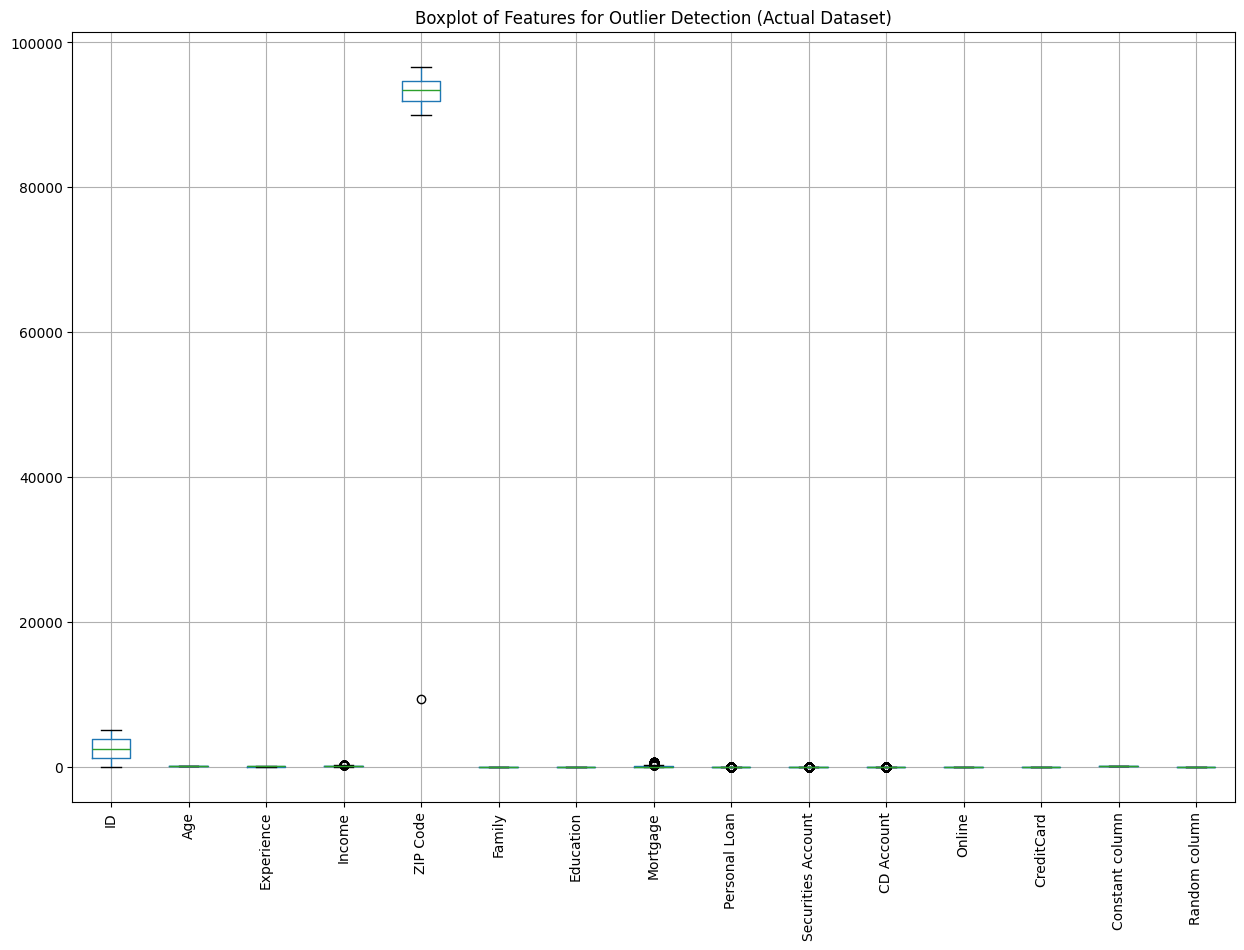

In [119]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Features for Outlier Detection (Actual Dataset)')
plt.show()

In [120]:
df.duplicated().sum()

0

<h2 style="text-align: center; font-family: 'Times New Roman';">2. DATA CLEANING</h2>


<font face="Times New Roman" size="4">
- Transform CCAvg column

In [121]:
df['CCAvg'] 

0       2/80
1       0/50
2       0/10
3       0/10
4       1/50
        ... 
3995    0/20
3996    1/50
3997    2/70
3998    1/00
3999    0/90
Name: CCAvg, Length: 4000, dtype: object

In [122]:
df['CCAvg'] = df['CCAvg'].astype(str).str.replace('/', '.')
df['CCAvg'] = pd.to_numeric(df['CCAvg'])

df['CCAvg']

0       2.8
1       0.5
2       0.1
3       0.1
4       1.5
       ... 
3995    0.2
3996    1.5
3997    2.7
3998    1.0
3999    0.9
Name: CCAvg, Length: 4000, dtype: float64

<font face="Times New Roman" size="4">
- Check negative values in Experience and remove noise

In [123]:
df[df['Experience']<0]['Experience'].count()

39

In [124]:
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    25
-2    10
-3     4
Name: count, dtype: int64

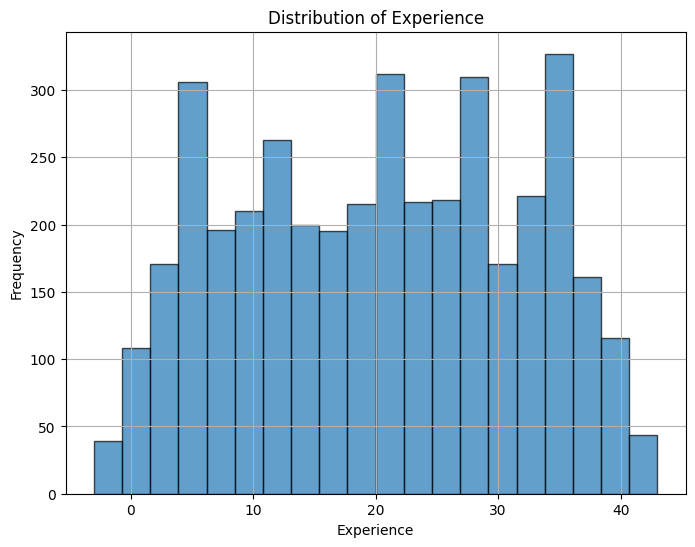

In [125]:
df['Experience'].describe()

plt.figure(figsize=(8,6))
plt.hist(df['Experience'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [126]:
df['Experience'] = df['Experience'].apply(abs) # absolute values

<font face="Times New Roman" size="4">
- Drop ID column

In [127]:
df.drop(['ID'], axis= 1, inplace= True)

<font face="Times New Roman" size="4">
- Remove outliers from mortgage using Z-score

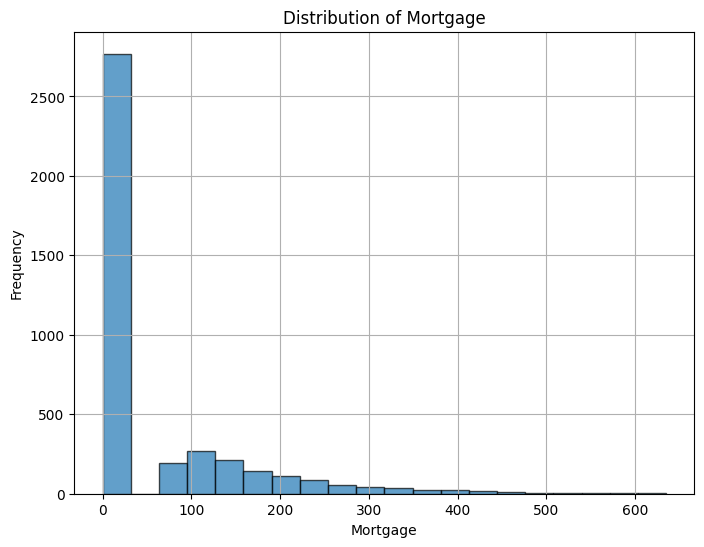

In [128]:
df['Mortgage'].describe()

plt.figure(figsize=(8,6))
plt.hist(df['Mortgage'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [129]:
z_scores = np.abs(stats.zscore(df['Mortgage']))
threshold = 3
df_no_outliers = df[(z_scores < threshold)]

<font face="Times New Roman" size="4">
- Drop ZIP code 

In [130]:
#df.drop(['ZIP Code'], axis= 1, inplace= True)

<font face="Times New Roman" size="4">
- Drop Date

In [131]:
df.drop(['Date'], axis=1, inplace= True)

<font face="Times New Roman" size="4">
- Remove missing values in education filling with the most frequent value of records having the same income and education

In [139]:
bins = [0, 25, 50, 75, 100, 150, 200, float('inf')] # intervals of income
labels = [1, 2, 3, 4, 5, 6, 7] 

df['Income Label'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

In [137]:
df['Education'] = df.groupby('Income Label')['Education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
df.drop(['Income Label'], axis=1, inplace= True)

/var/folders/q8/7ss60v9d2t91mvvwbkcjcd3h0000gn/T/ipykernel_22823/1154679769.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Education'] = df.groupby('Income Label')['Education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


In [138]:
df.isnull().sum().sum()

0

<font face="Times New Roman" size="4">

---
### Distribution of key features

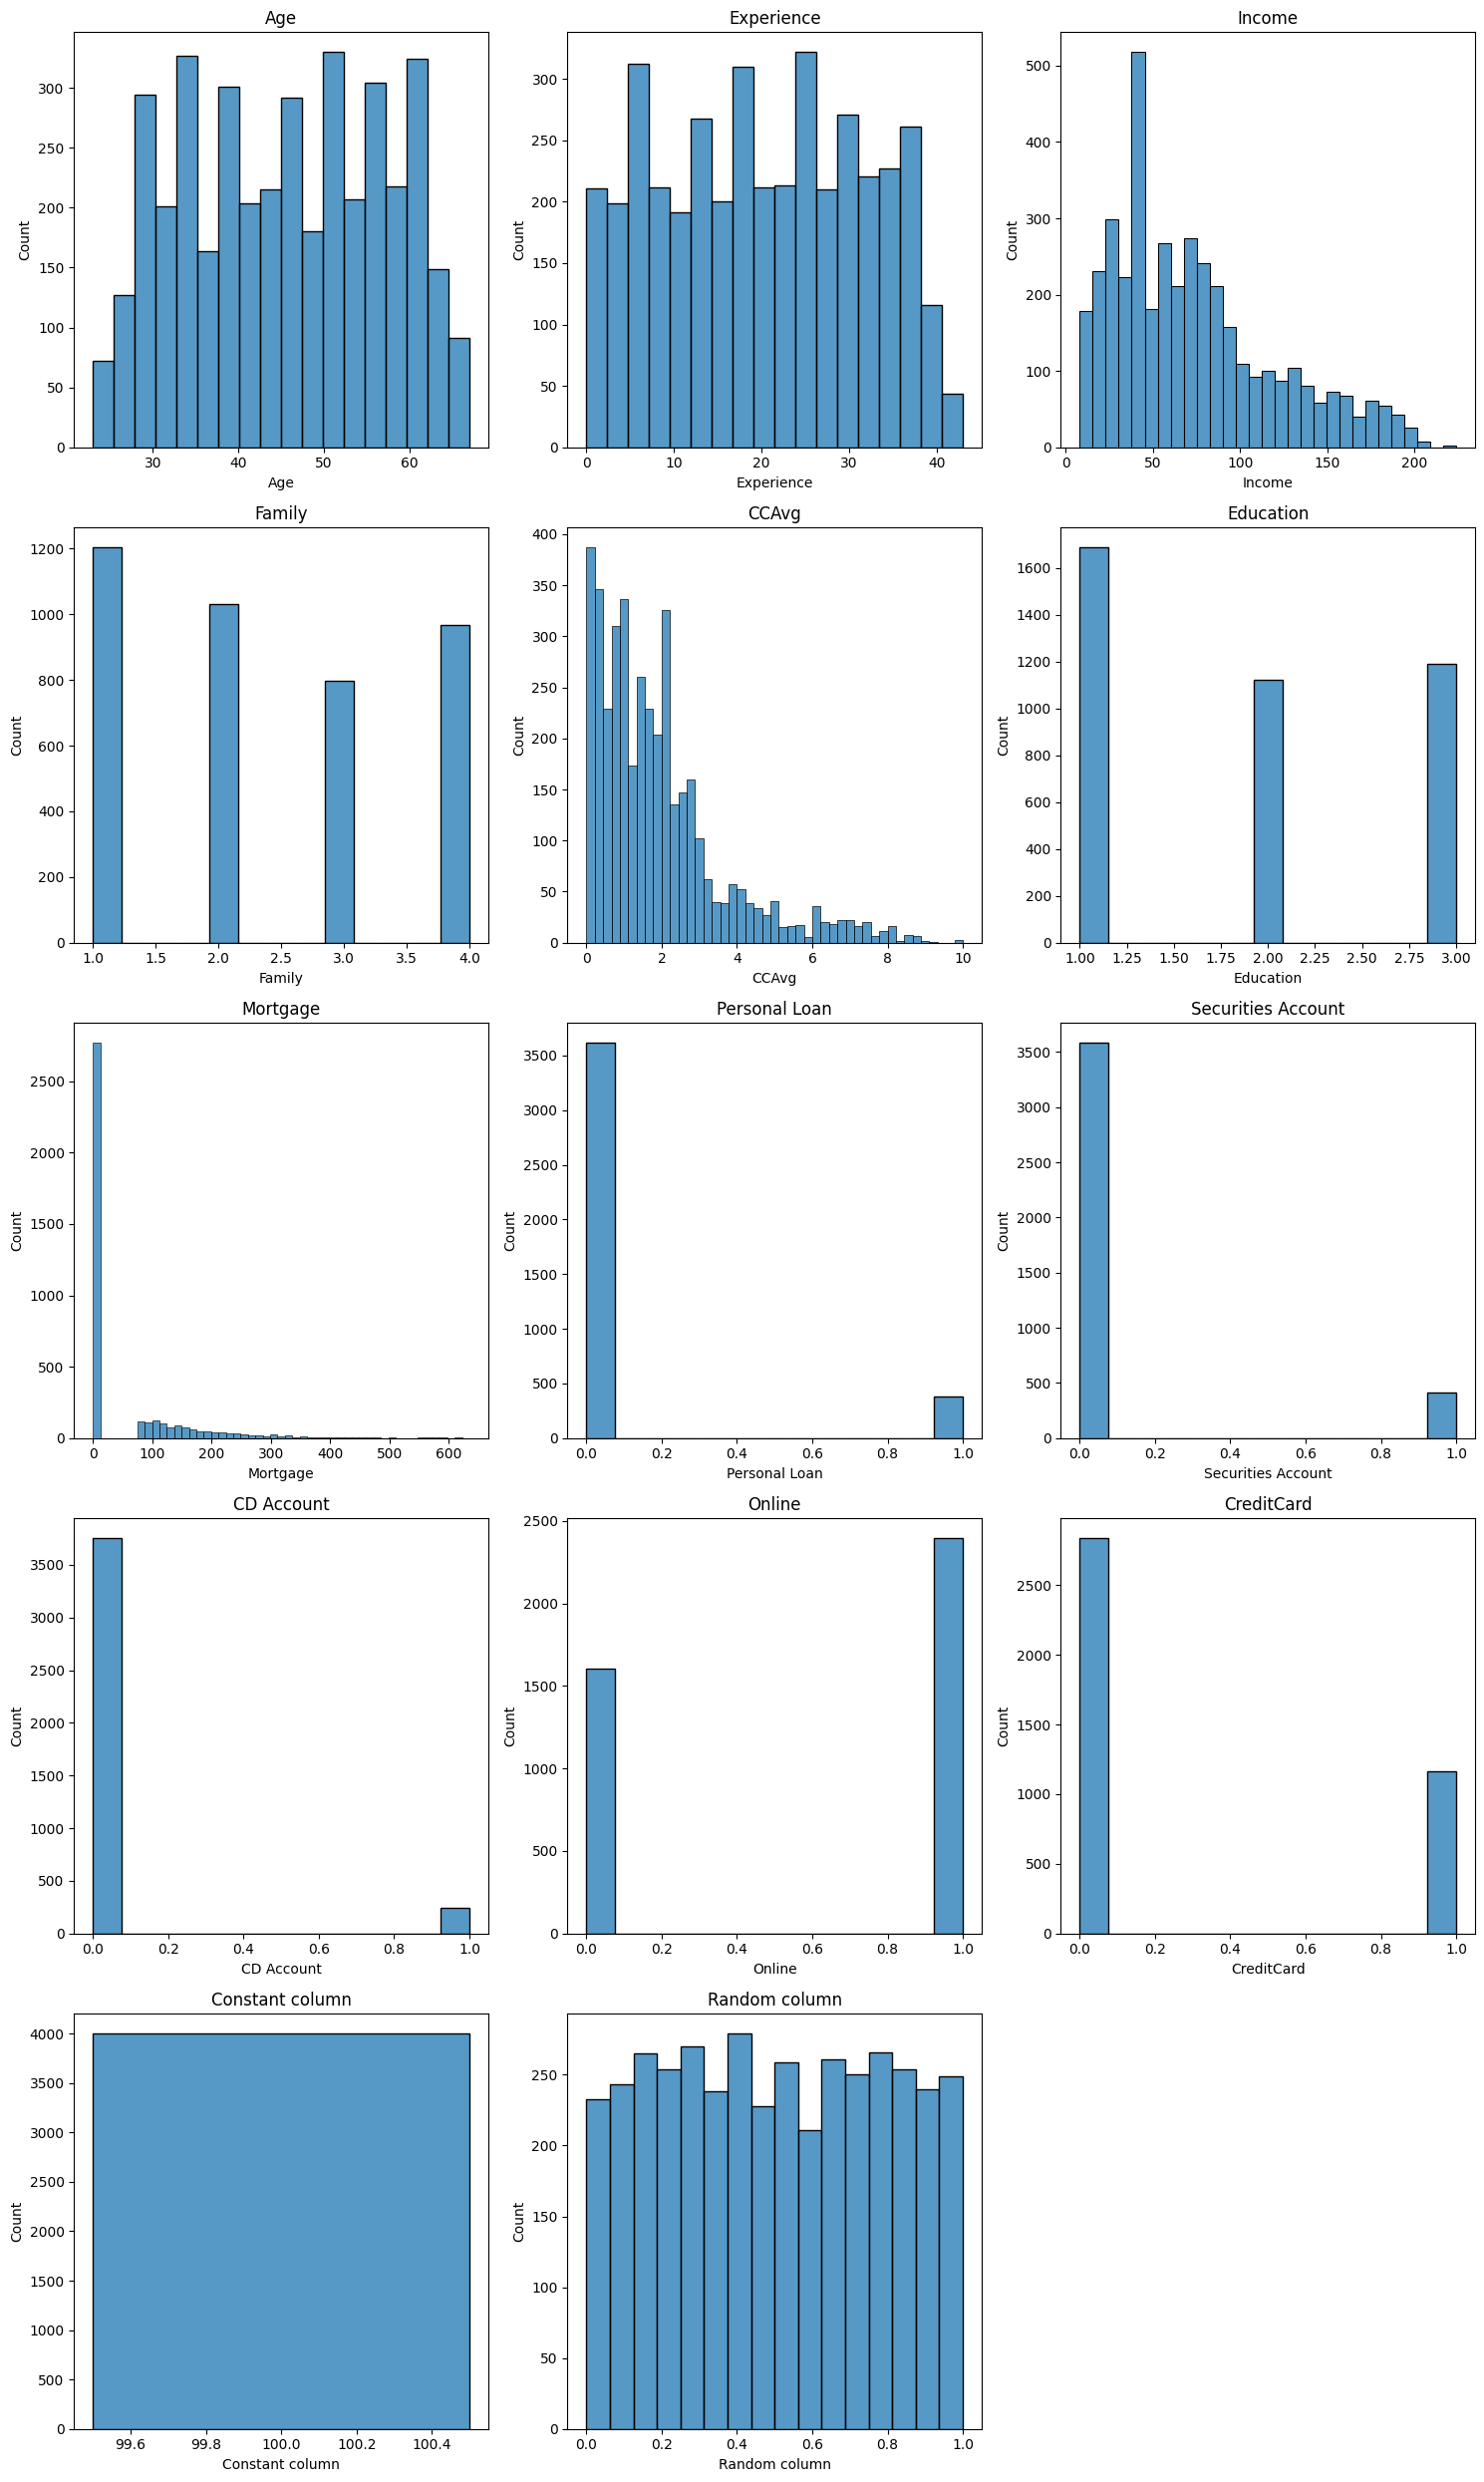

In [25]:
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
           'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
           'Online', 'CreditCard', 'Constant column', 'Random column']


fig, ax = plt.subplots(5, 3, figsize=(15, 25))


for i, col in enumerate(columns):
    sns.histplot(df[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(col)


fig.delaxes(ax[4, 2])
plt.tight_layout()
plt.show()

<font face="Times New Roman" size="4">

---
### Correlation


<p style="font-family: 'Times New Roman'; font-size: 20px;">
This section of the analysis focuses on computing the correlations between the features and the target variable, which in this case is Personal Loan. For numeric features, the Point-Biserial correlation has been used to measure the relationship with the binary target. For non-numeric features, the Spearman rank correlation has been used. Additionally, a correlation matrix for all numeric features has been computed and visualised with a heatmap to show pairwise correlations across the dataset. This helps identify any multicollinearity or strong relationships between the features, including their correlation with Personal Loan.
</p>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
The bar chart demonstrates the relationship between specific features and the probability of a customer accepting a personal loan: the most significant correlation is with income, indicating that customers with higher income levels are more likely to accept a personal loan. Similarly, there is a strong positive correlation between CCAvg (average credit card spending) and the likelihood of a customer accepting a loan, suggesting that those who spend more on their credit cards are more likely to take out a loan.<br><br>
Other features, such as CD Account, Mortgage, and Education, demonstrate moderate correlations, though their influence is less pronounced in comparison to Income and CCAvg. Meanwhile, features such as Family, Securities Account, and Online Banking have weaker correlations, indicating a less significant relationship with loan acceptance.<br><br>
There is minimal correlation between CreditCard, Age, Experience, and the Random column. This suggests that these factors are unlikely to influence a customer's decision to accept a personal loan. 
</p>

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5546: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


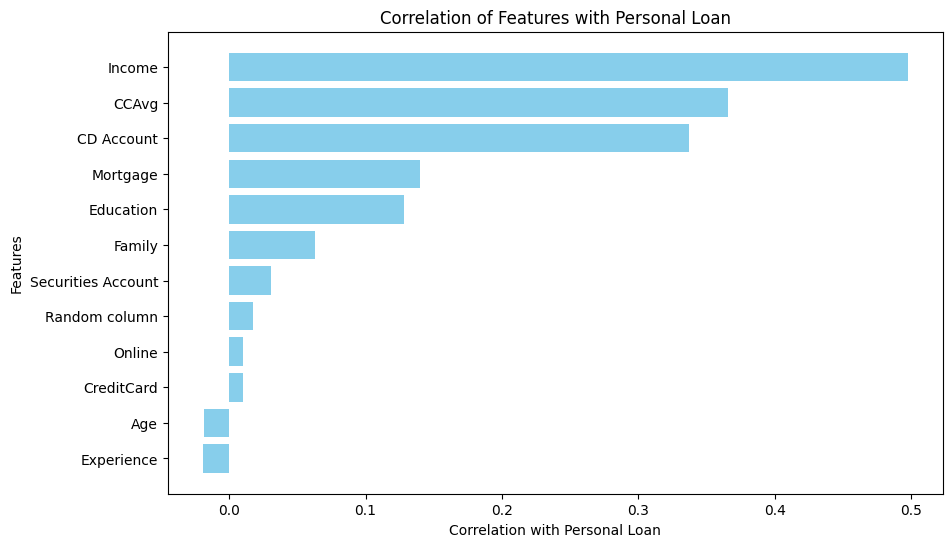

In [26]:
correlation_results = {}
for col in df.columns:
    if col != 'Personal Loan':

        if np.issubdtype(df[col].dtype, np.number):
            correlation, _ = pointbiserialr(df['Personal Loan'], df[col])
            correlation_results[col] = correlation
        else:
            correlation, _ = spearmanr(df['Personal Loan'], df[col])
            correlation_results[col] = correlation

correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Feature', 'Correlation'])
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation with Personal Loan')
plt.ylabel('Features')
plt.title('Correlation of Features with Personal Loan')
plt.gca().invert_yaxis()  
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 20px;">
The heat map provides a visual representation of the pairwise correlations between the numeric features in the dataset: the diagonal line represents a perfect correlation (1.00) between each feature and itself. There is a strong correlation between age and experience (0.99), indicating that these two factors likely provide similar information. Income demonstrates a moderate positive correlation with CCAvg (0.64), Personal Loan (0.50), and CD Account (0.18), underscoring its significance in predicting loan acceptance and its relationship with other financial behaviours.<br><br>
The strongest correlation is between Personal Loan and Income (0.50) and CCAvg (0.37), which corroborates the earlier finding that customers with higher incomes and more credit card usage are more likely to accept a loan. There is a weaker, but still positive correlation with the CD account (0.34).<br><br>
As anticipated, the random column shows no meaningful relationships with other features, as well as the Constant column, which is not correlated with any features.<br><br>
</p>


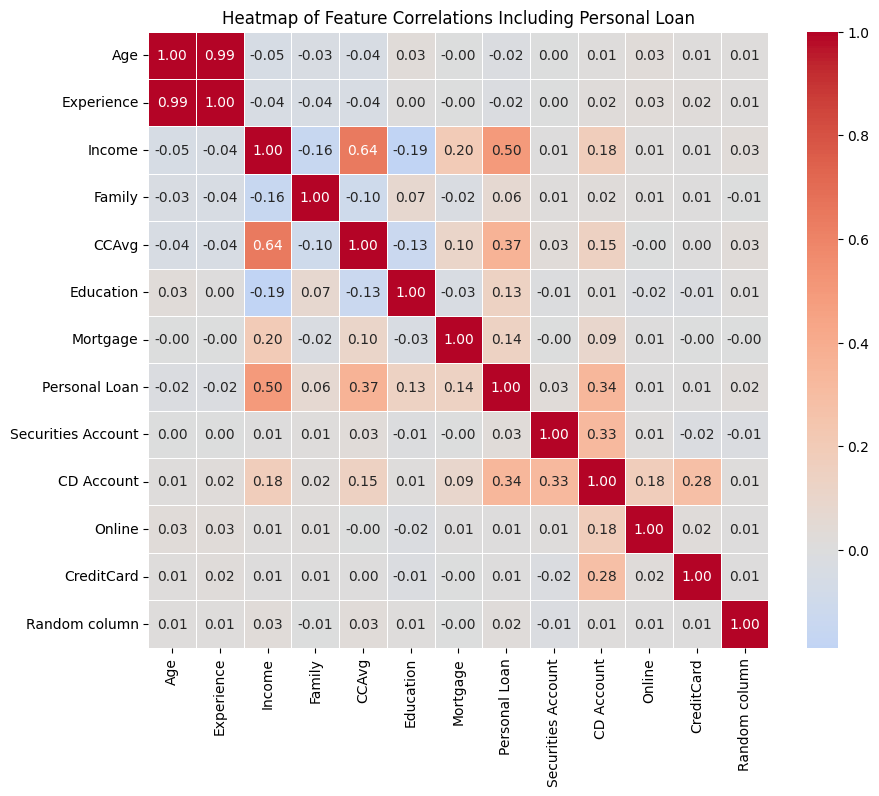

In [142]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(columns=['Constant column'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Feature Correlations Including Personal Loan')
plt.show()

<h2 style="text-align: center; font-family: 'Times New Roman';">3. DIVISION IN TRAIN AND TEST SET</h2>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
The features will be used as input variables, while the target ('Personal Loan') represents the output we want to predict—whether a customer accepted the personal loan.
</p>

In [28]:
X = df.drop('Personal Loan', axis=1)  
y = df['Personal Loan'] 

<p style="font-family: 'Times New Roman'; font-size: 20px;">
The next section splits the dataset into training and test sets using an 80/20 ratio. The training set will be used to train the model, while the test set will be used to evaluate its performance on unseen data.
</p>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font face="Times New Roman" size="4">

---
### Perform oversampling on train set for unbalanced classes

<p style="font-family: 'Times New Roman'; font-size: 20px;">
In order to address the significant imbalance in the target variable, Personal Loan, this analysis employed oversampling. The majority class (customers who did not accept the loan) had 3616 samples, while the minority class (customers who accepted the loan) had only 384 samples: oversampling is an effective method for addressing this imbalance by increasing the number of samples in the minority class (those who accepted the loan). This is achieved by randomly replicating samples from the minority class in order to match or come closer to the number of samples in the majority class. Consequently, the model will learn from a more balanced dataset and be less prone to predicting the majority class.
</p>

In [35]:
def oversample(X, y, target_ratio=1.0, random_state=None):
    """
    Custom oversampling function with adjustable ratio between minority and majority classes.

    Parameters:
    - X: Features dataframe.
    - y: Target series.
    - target_ratio: Desired ratio of minority to majority samples (default is 1.0 for 1:1 ratio).
    - random_state: Seed for reproducibility (default is None).

    Returns:
    - X_resampled: Resampled features dataframe.
    - y_resampled: Resampled target series.
    """

    if random_state is not None:
        np.random.seed(random_state)

    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    class_counts = y.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    X_majority = X[y == majority_class]
    X_minority = X[y == minority_class]

    n_samples_in_majority = len(X_majority)
    n_samples_in_minority = len(X_minority)
    n_samples_to_add = int((target_ratio * n_samples_in_majority) - n_samples_in_minority)

    if n_samples_to_add > 0:
        X_minority_oversampled = X_minority.sample(n=n_samples_to_add, replace=True)
        X_resampled = pd.concat([X_majority, X_minority, X_minority_oversampled])
        y_resampled = pd.concat([pd.Series([majority_class] * n_samples_in_majority), 
                                 pd.Series([minority_class] * (n_samples_in_minority + n_samples_to_add))])
    else:
        # If the target_ratio is lower, do not oversample, return the original data
        X_resampled = pd.concat([X_majority, X_minority])
        y_resampled = pd.concat([pd.Series([majority_class] * n_samples_in_majority),
                                 pd.Series([minority_class] * n_samples_in_minority)])

    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=random_state)

    return X_resampled, y_resampled



<p style="font-family: 'Times New Roman'; font-size: 20px;">
Before oversampling:  <strong>Personal Loan</strong>:

<ul>
  <li><strong>Class 0 (No loan accepted):</strong> 2908 samples</li>
  <li><strong>Class 1 (Loan accepted):</strong> 292 samples</li>
</ul>

The target ratio was set at 0.6, which entailed oversampling the minority class until it reached a size of 60% of the majority class.
After oversampling, the class distribution became more balanced:
<ul>
  <li><strong>Class 0 (No loan accepted):</strong> 2908 samples</li>
  <li><strong>Class 1 (Loan accepted):</strong> 1744 samples</li>
</ul>

This improves the model's ability to detect patterns in the minority class, resulting in better predictive performance for customers who are likely to accept a personal loan. By using a target ratio of 0.6, the analysis avoids completely oversampling the minority class to match the majority, thus reducing potential overfitting.
</p>


In [36]:
X_train_resampled, y_train_resampled = oversample(X_train, y_train, target_ratio= 0.6, random_state=42)

print("Original class distribution in training set:")
print(y_train.value_counts())

print("\nResampled class distribution in training set:")
print(y_train_resampled.value_counts())

Original class distribution in training set:
Personal Loan
0    2908
1     292
Name: count, dtype: int64

Resampled class distribution in training set:
0    2908
1    1744
Name: count, dtype: int64


<h1 style="text-align: center; font-family: 'Times New Roman';">4. MODELS</h2>




<h2 style="text-align: center; font-family: 'Times New Roman';">4.1 LOGISTIC REGRESSION</h2>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
<strong>Logistic Regression</strong> is a statistical method used for binary classification problems, where the goal is to predict the probability of a binary outcome (in this case, whether a customer will accept a personal loan or not). The model outputs a probability that is then mapped to a binary label (0 or 1) using a threshold (typically 0.5).
</p>
<p style="font-family: 'Times New Roman'; font-size: 20px;">
In the code, a logistic regression model is built using a pipeline which has two main steps:
1. <strong>StandardScaler</strong>: This scales the features, ensuring that they have zero mean and unit variance, which is important for many machine learning models, including logistic regression, to perform optimally.
2. <strong>LogisticRegression</strong>: This is the classifier that will predict whether a customer will accept a loan or not.
</p>


In [209]:
scaler = StandardScaler()

pipeline_logreg = Pipeline([
    ('scaler', scaler),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

<p style="font-family: 'Times New Roman'; font-size: 20px;">
After defining the pipeline, the model is trained using the oversampled training data (`X_train_resampled` and `y_train_resampled`). The trained model is then used to make predictions on the test data (`X_test`). Finally, the logistic regression step is accessed from the pipeline to retrieve the trained model for further analysis or evaluation.
</p>


In [210]:
pipeline_logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = pipeline_logreg.predict(X_test)
logreg = pipeline_logreg.named_steps['logreg']

<font face="Times New Roman" size="4">

---
### Model evaluation


<p style="font-family: 'Times New Roman'; font-size: 20px;">
A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual labels with the predicted labels, showing how well the model is classifying the data.
<ul>
  <li><strong>True Positives (TP):</strong> Correctly predicted positive cases (bottom-right: 76).</li>
  <li><strong>True Negatives (TN):</strong> Correctly predicted negative cases (top-left: 662).</li>
  <li><strong>False Positives (FP):</strong> Incorrectly predicted positives (top-right: 46), also known as "Type I error."</li>
  <li><strong>False Negatives (FN):</strong> Incorrectly predicted negatives (bottom-left: 16), also known as "Type II error."</li>
</ul>
</p>


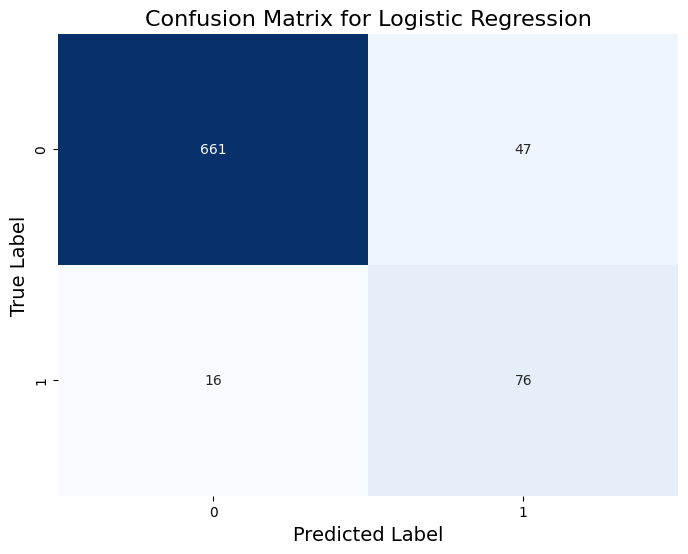

In [211]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 16px;">
1. <strong>Accuracy</strong>:<br>
Measures the proportion of correct predictions (both true positives and true negatives) out of all predictions.<br>
Formula: 
<pre>
Accuracy = (TP + TN) / (TP + TN + FP + FN)
</pre>


In [212]:
accuracy = accuracy_score(y_test, y_pred_logreg)

<br>
2. <strong>Precision</strong>:<br>
Measures the proportion of true positives out of all positive predictions made by the model.<br>
Formula: 
<pre>
Precision = TP / (TP + FP)


In [213]:
precision = precision_score(y_test, y_pred_logreg)

<br>
3. <strong>Recall</strong>:<br>
Measures the proportion of true positives out of all actual positive cases in the dataset.<br>
Formula: 
<pre>
Recall = TP / (TP + FN)
</pre>
<br>

In [214]:
recall = recall_score(y_test, y_pred_logreg)

<br>
4. <strong>F1 Score</strong>:<br>
The harmonic mean of precision and recall, providing a balance between the two.<br>
Formula: 
<pre>
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
</pre>

In [215]:
f1 = f1_score(y_test, y_pred_logreg)

<br>
5. <strong>ROC AUC</strong>:<br>
Measures the model’s ability to distinguish between classes by calculating the area under the ROC curve, which plots the true positive rate (recall) against the false positive rate.<br>
</p>

In [216]:
roc_auc_logreg = roc_auc_score(y_test, pipeline_logreg.predict_proba(X_test)[:, 1])

In [217]:
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc_logreg]
})

metrics_table

,Metric,Score
0,Accuracy,0.921250
1,Precision,0.617886
2,Recall,0.826087
3,F1 Score,0.706977
4,ROC AUC,0.951885


<font face="Times New Roman" size="4">

---
### Feature importance

<p style="font-family: 'Times New Roman'; font-size: 20px;">
The bar chart visualizes the importance of each feature in the logistic regression model by displaying the feature coefficients: positive coefficients indicate features that increase the likelihood of the target outcome (loan acceptance), while negative coefficients decrease the likelihood.
</p>
<p style="font-family: 'Times New Roman'; font-size: 20px;">
Key features with the highest positive coefficients include <strong>Income</strong> and <strong>CD Account</strong>, meaning higher income and having a CD account are strongly associated with accepting a personal loan. <strong>Age</strong> has a significant negative coefficient, indicating that older customers are less likely to accept the loan. Other features such as <strong>Education</strong>, <strong>Experience</strong>, and <strong>Family</strong> have moderate positive effects, while features like <strong>CreditCard</strong> and <strong>Online Banking</strong> have minimal impact on loan acceptance.
</p>


In [218]:
coefficients_lr = logreg.coef_.flatten()
coefficients_lr

array([-1.26510649,  1.17354308,  2.64602213,  0.56901069,  0.42940802,
        1.12518943,  0.03312357, -0.35509525,  1.48917754, -0.39753701,
       -0.32063329,  0.        , -0.04477256])

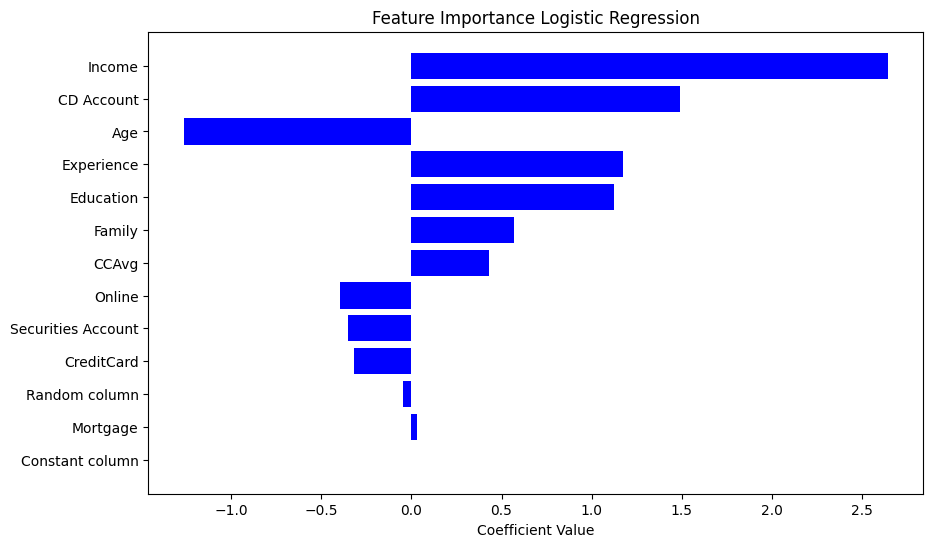

In [219]:
features = X_train.columns  
importance_lr = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients_lr
})

importance_lr['Absolute Importance'] = np.abs(importance_lr['Importance'])
importance = importance_lr.sort_values(by='Absolute Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='b')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Logistic Regression')
plt.gca().invert_yaxis()  
plt.show()

<font face="Times New Roman" size="4">

---
### Feature selection

<p style="font-family: 'Times New Roman'; font-size: 20px;">
<strong>Feature selection</strong>  improves the model's performance and interpretability by focusing only on the most relevant features. In  this way the model becomes less complex, reducing the risk of overfitting and improving generalisation on unseen data. Furthermore, feature selection can improve computational efficiency, as reducing the number of features allows for faster model training and prediction times. Finally, it streamlines the model, facilitating the identification of the primary factors influencing the predictions.
</p>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
Here, the training data is scaled using the <strong>StandardScaler</strong> from the pipeline. The scaled data is then passed into the <strong>Sequential Feature Selector (SFS)</strong>, which will select the 8 best features from the training set based on their importance for predicting the target variable.
</p>


In [220]:
sfs = SequentialFeatureSelector(
    pipeline_logreg.named_steps['logreg'], 
    n_features_to_select=8,  
    scoring="roc_auc", 
    tol=0.01,  
    cv=None  
)

In [221]:
X_train_scaled = pipeline_logreg.named_steps['scaler'].transform(X_train)  # Get scaled data
sfs.fit(X_train_scaled, y_train) 

SequentialFeatureSelector(cv=None,
                          estimator=LogisticRegression(max_iter=1000,
                                                       random_state=42),
                          n_features_to_select=8, scoring='roc_auc', tol=0.01)

In [222]:
list_columns = list(X_train.columns[sfs.support_])

# Print the selected features
print("Selected features:", list_columns)

Selected features: ['Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [223]:
selected_columns_mask = sfs.support_
X_train_selected = X_train.loc[:, selected_columns_mask]
X_test_selected = X_test.loc[:, selected_columns_mask]

print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

X_train_selected shape: (3200, 8)
X_test_selected shape: (800, 8)


<p style="font-family: 'Times New Roman'; font-size: 20px;">
The logistic regression model is retrained using only the 8 selected features. After fitting the model to the new training data, predictions are made on the selected features from the test set. 
</p>


In [224]:
logreg_selected = LogisticRegression(random_state=42, max_iter=1000)
logreg_selected.fit(X_train_selected, y_train)
y_pred_selected = logreg_selected.predict(X_test_selected)

<font face="Times New Roman" size="4">

---
### Model evaluation

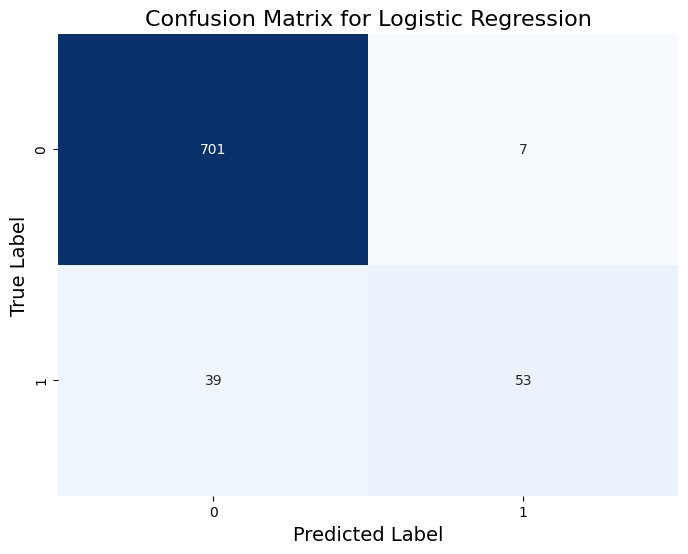

In [225]:
conf_matrix = confusion_matrix(y_test, y_pred_selected)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [226]:
accuracy = accuracy_score(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected)
recall = recall_score(y_test, y_pred_selected)
f1 = f1_score(y_test, y_pred_selected)

y_pred_proba = logreg_selected.predict_proba(X_test_selected)[:, 1] 
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba)

metrics_table2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc_logreg]
})

metrics_table2

,Metric,Score
0,Accuracy,0.942500
1,Precision,0.883333
2,Recall,0.576087
3,F1 Score,0.697368
4,ROC AUC,0.951839


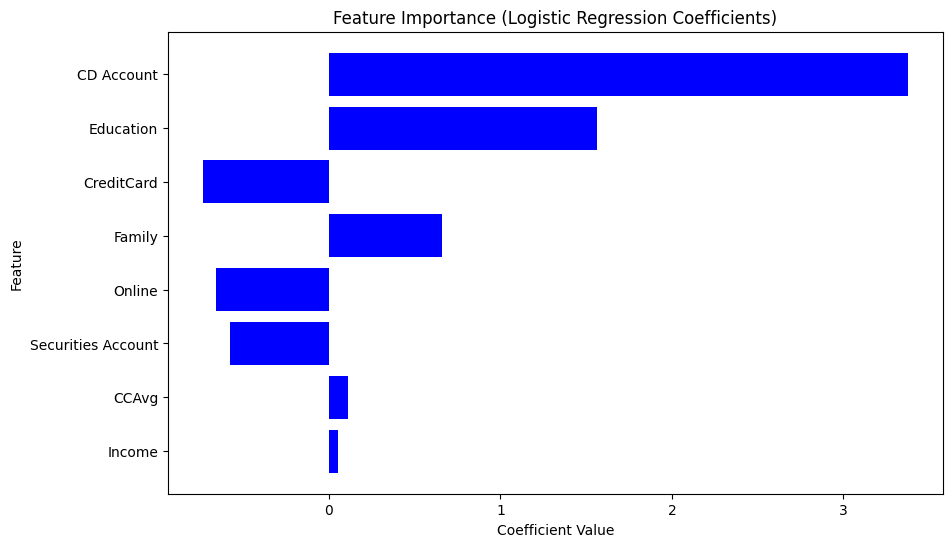

In [227]:
feature_names = X_train_selected.columns 
coefficients = logreg_selected.coef_[0]  

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

feature_importance['Abs_Importance'] = feature_importance['Importance'].apply(np.abs)
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.gca().invert_yaxis()  
plt.show()


<font face="Times New Roman" size="4">

---
### Comparison between the two models 

<p style="font-family: 'Times New Roman'; font-size: 20px;">
This final section compares the performance of the two logistic regression models: results demonstrate that the model with feature selection exhibits marginal improvements in accuracy (from 0.921 to 0.946) and precision (from 0.617 to 0.901), although it exhibits a slight decline in recall. The overall ROC AUC remains similar, indicating that the model with feature selection maintains a strong ability to discriminate between classes while being more precise.
</p>


In [228]:
combined_metrics_table = pd.merge(
    metrics_table, 
    metrics_table2, 
    on='Metric'
)

combined_metrics_table.columns = ['Metric', 'Model without Feature Selection', 'Model with Feature Selection']

combined_metrics_table

,Metric,Model without Feature Selection,Model with Feature Selection
0,Accuracy,0.921250,0.942500
1,Precision,0.617886,0.883333
2,Recall,0.826087,0.576087
3,F1 Score,0.706977,0.697368
4,ROC AUC,0.951885,0.951839


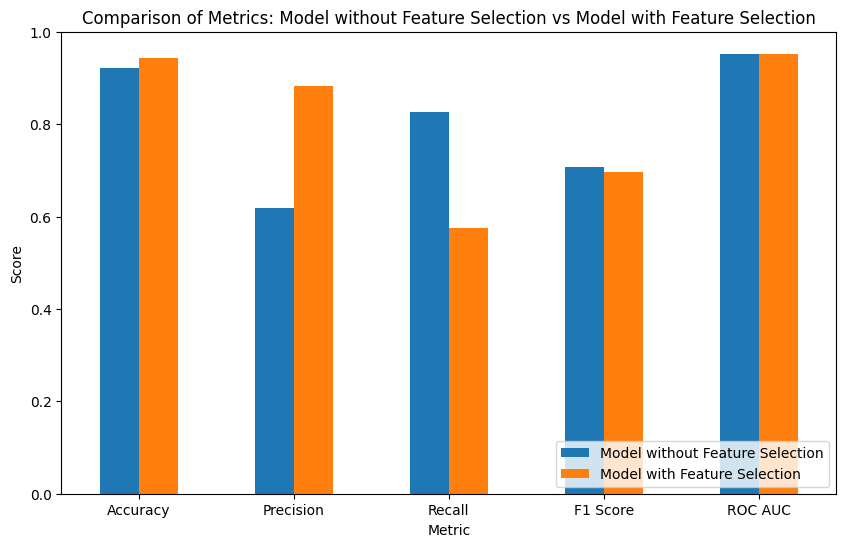

In [229]:
combined_metrics_table.plot(x='Metric', kind='bar', figsize=(10, 6), rot=0)
plt.title('Comparison of Metrics: Model without Feature Selection vs Model with Feature Selection')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.legend(loc="lower right")
plt.show()

<h1 style="text-align: center; font-family: 'Times New Roman';">4.2 RANDOM FOREST</h1>

<p style="font-family: 'Times New Roman'; font-size: 20px;">
A <strong>Random Forest</strong> is an ensemble learning method that constructs multiple decision trees during training and merges their predictions to improve accuracy and control overfitting. Each tree in the forest is built from a random subset of the data, and the final prediction is made by using a majority vote. This process reduces the likelihood of overfitting, making the model more robust to variance in the data. Random forests are particularly useful for handling complex datasets with numerous features and interactions, and are therefore an invaluable tool for businesses working with large and complex data sets.
</p>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
A grid of hyperparameters for tuning the Random Forest model is initiated, which includes the number of estimators (`n_estimators`), the maximum depth of trees (`max_depth`), the minimum number of samples for a split (`min_samples_split`), the minimum number of samples for a leaf (`min_samples_leaf`), and whether to use bootstrapping. The effectiveness of these parameters will be evaluated during the model training phase, with the objective of identifying the optimal configuration.
</p>


In [230]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],            
    'max_depth': [3, 5, 7],                    
    'min_samples_split': [10, 15, 20],         
    'min_samples_leaf': [5, 10],               
    'bootstrap': [True]                        
}

<p style="font-family: 'Times New Roman'; font-size: 20px;">
A <strong>RandomForestClassifier</strong> is initialized with class balancing (`class_weight='balanced'`). The <strong>GridSearchCV</strong> is set up to perform 10-fold cross-validation (`cv=10`) and search through the parameter grid to find the best combination of hyperparameters for the model.
</p>


In [231]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, verbose=1)  

In [232]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

<p style="font-family: 'Times New Roman'; font-size: 20px;">
Once the grid search is complete, the best hyperparameters for the Random Forest model are extracted. These include `n_estimators=150`, `max_depth=7`, `min_samples_split=10`, and `min_samples_leaf=5`, which optimize the model’s performance on the dataset.
</p>

In [233]:
print("Best params:")
print(grid_search.best_params_)

Best params:
{'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}


<p style="font-family: 'Times New Roman'; font-size: 20px;">
The best Random Forest model is then used to predict the target variable on the test set. 
</p>


In [234]:
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       708
           1       0.87      0.88      0.88        92

    accuracy                           0.97       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.97      0.97      0.97       800



<font face="Times New Roman" size="4">

---
### Model evaluation


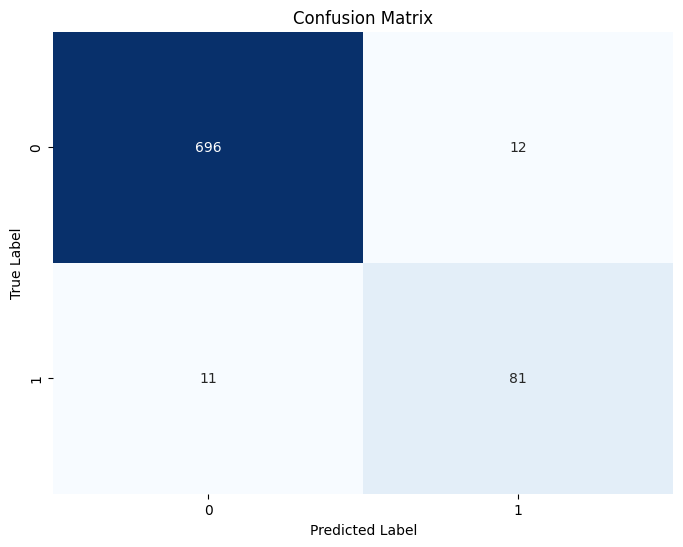

In [235]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [236]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

metrics_table

,Metric,Score
0,Accuracy,0.971250
1,Precision,0.870968
2,Recall,0.880435
3,F1 Score,0.875676
4,ROC AUC,0.988148


- Feature importance

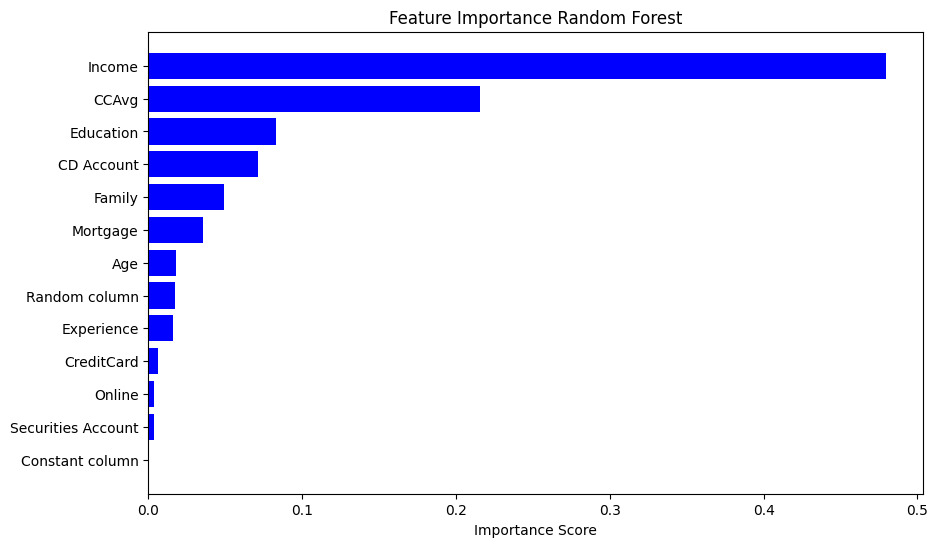

In [237]:
feature_importances_rf = best_rf.feature_importances_
importance_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
})

importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_rf['Feature'], importance_rf['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance Random Forest')
plt.gca().invert_yaxis()  
plt.show()

<h1 style="text-align: center; font-family: 'Times New Roman';"
>4.3 GRADIENT BOOSTING</h1>


<p style="font-family: 'Times New Roman'; font-size: 20px;">
<strong>Gradient Boosting</strong> is an ensemble learning method that builds models sequentially, with each new model focusing on correcting the errors of the previous ones. The method works by combining weak learners (typically decision trees) into a single strong model by minimising a loss function. The key idea is to train models that correct the residual errors made by previous models, resulting in a highly accurate final model. Unlike Random Forest, which builds trees in parallel, Gradient Boosting builds them sequentially, making it more sensitive to overfitting but often more powerful when tuned properly.
<p style="font-family: 'Times New Roman'; font-size: 20px;">
The analysis for Gradient Boosting follows a similar process to the Random Forest analysis. It includes the use of <strong>GridSearchCV</strong> for hyperparameter tuning, where various parameters such as the number of estimators, learning rate, and tree depth are tested. The best-performing model is selected after cross-validation, and its performance is evaluated on the test set. This approach ensures that the most optimized Gradient Boosting model is chosen for the dataset.
</p>


In [238]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],         
    'learning_rate': [0.01, 0.05, 0.1],   
    'max_depth': [3, 4, 5],                
    'min_samples_split': [10, 15],         
    'min_samples_leaf': [5, 10],           
    'subsample': [0.6, 0.8],               
}

In [239]:
gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb, 
    cv=10, 
    n_jobs=-1, 
    verbose=1
)

In [240]:
grid_search_gb.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8]},
             verbose=1)

In [241]:
print("Best params:")
print(grid_search_gb.best_params_)

Best params:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.6}


In [242]:
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
# classification_report(y_test, y_pred_gb)

<font face="Times New Roman" size="4">

---
### Model evaluation

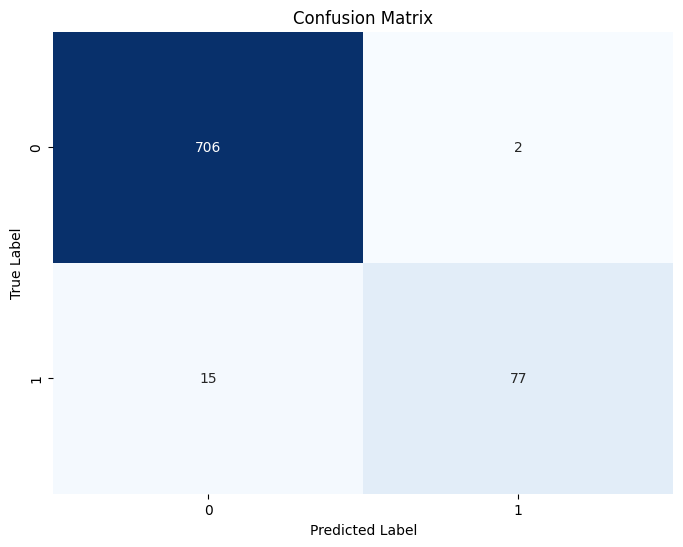

In [243]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [244]:
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, best_gb.predict_proba(X_test)[:, 1])

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

metrics_table

,Metric,Score
0,Accuracy,0.978750
1,Precision,0.974684
2,Recall,0.836957
3,F1 Score,0.900585
4,ROC AUC,0.994949


- feature importance

13 13


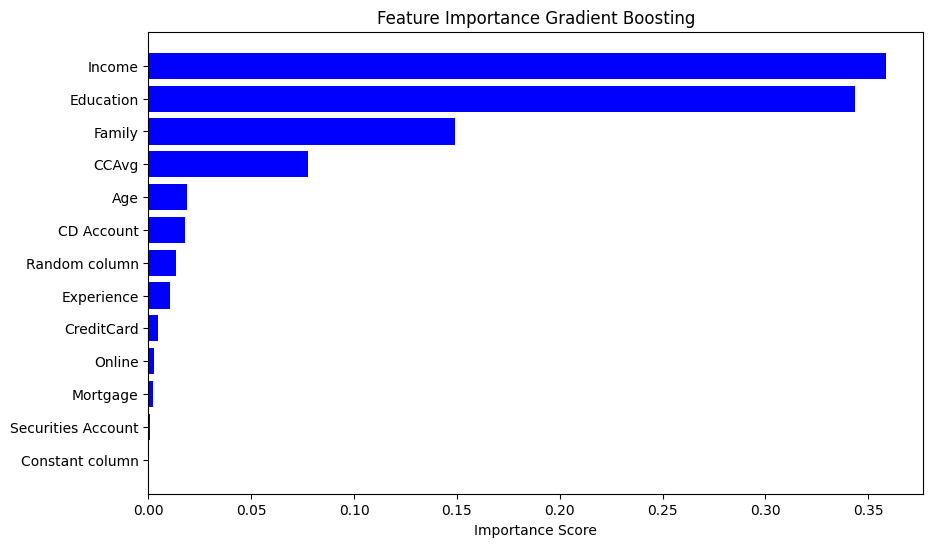

In [245]:
feature_importances_gb = best_gb.feature_importances_
importance_gb = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_gb})

print(len(features), len(feature_importances_gb))


importance_gb = importance_gb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_gb['Feature'], importance_gb['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance Gradient Boosting')
plt.gca().invert_yaxis()  
plt.show()

<h1 style="text-align: center; font-family: 'Times New Roman';"
>4.4 LIGHT GBM</h1>


In [48]:
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.05],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [20, 30, 40],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

In [143]:
# lgbm = LGBMClassifier(random_state=5)
# grid_search = GridSearchCV(
#     estimator=lgbm, 
#     param_grid=param_grid, 
#     scoring='accuracy',  
#     cv=5, 
#     verbose=1,
#     n_jobs=-1 
# )
# grid_search.fit(X_train, y_train)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Use the best model from grid search to make predictions
best_lgbm = grid_search.best_estimator_
y_pred_lgb = best_lgbm.predict(X_test)

----------

In [41]:
lgbm = LGBMClassifier(random_state=5)
lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 292, number of negative: 2908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091250 -> initscore=-2.298467
[LightGBM] [Info] Start training from score -2.298467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<font face="Times New Roman" size="4">

---
### Model evaluation

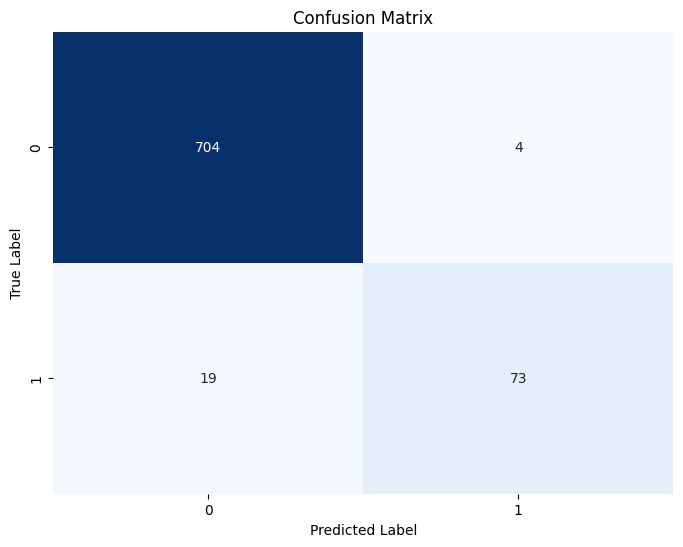

In [42]:
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
# roc_auc = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

metrics_table

,Metric,Score
0,Accuracy,0.971250
1,Precision,0.948052
2,Recall,0.793478
3,F1 Score,0.863905


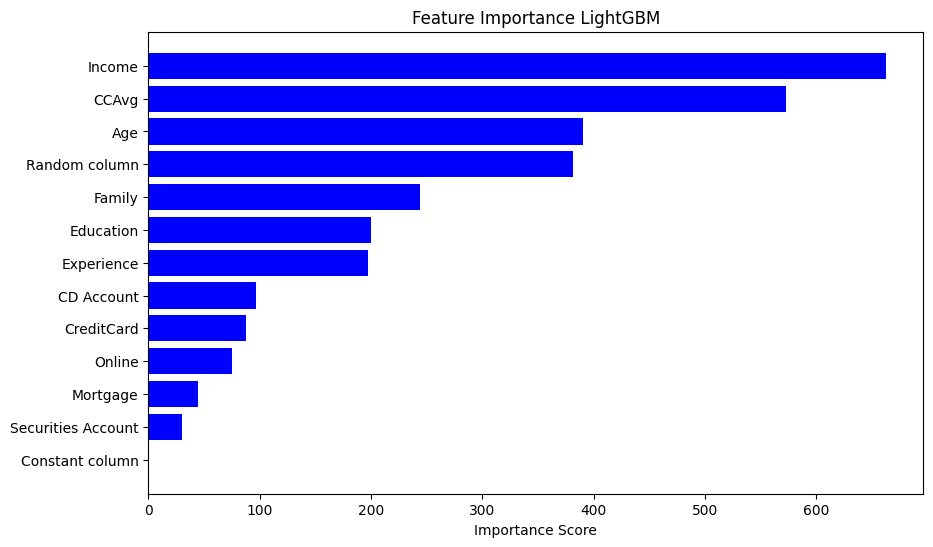

In [47]:
features = X_train.columns
feature_importances_lgb = lgbm.feature_importances_

importance_lgb = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_lgb
})

importance_lgb = importance_lgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_lgb['Feature'], importance_lgb['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance LightGBM')
plt.gca().invert_yaxis() 
plt.show()


<h1 style="text-align: center; font-family: 'Times New Roman';">Performance comparison</h1>


<font face="Times New Roman" size="4">

### Explanation of Performance Metrics

When evaluating machine learning models, several performance metrics help us understand how well the model is performing on a given task. In this case, we are looking at **Test Accuracy**, **Precision**, **Recall**, and the **F1 Score**.

- **Test Accuracy**: The percentage of correct predictions made on the test data, indicating the overall reliability of the model.
- **Precision**: The proportion of predicted positive cases (i.e., customers likely to take a loan) that are actually correct. High precision is important here to avoid wasting marketing efforts on customers who are unlikely to take out a loan.
- **Recall**: The proportion of actual positive cases (customers who took out a loan) that were correctly identified by the model. Recall is crucial for ensuring that potential loan customers are not missed.
- **F1 Score**: A harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives, which is key in this task.

The following table summarizes the performance of three machine learning models: **Logistic Regression**, **Random Forest**, and **Gradient Boosting**. 
</font>


In [282]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)


accuracy_lgb = accuracy_score(y_test, y_pred_lgbm)
precision_lgb = precision_score(y_test, y_pred_lgbm)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)


metrics_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'lgb'],
    'Test Accuracy': [accuracy_logreg, accuracy_rf, accuracy_gb,accuracy_lgb ],
    'Precision': [precision_logreg, precision_rf, precision_gb, precision_lgb],
    'Recall': [recall_logreg, recall_rf, recall_gb, recall_lgb],
    'F1 Score': [f1_logreg, f1_rf, f1_gb, f1_lgb]
})
metrics_table

,Model,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.92125,0.617886,0.826087,0.706977
1,Random Forest,0.97125,0.870968,0.880435,0.875676
2,Gradient Boosting,0.97875,0.974684,0.836957,0.900585
3,lgb,0.97125,0.948052,0.793478,0.863905


<font face="Times New Roman" size="4">

- **Logistic Regression**: While it has a decent recall (ability to capture potential loan customers), it suffers from lower precision and F1 score, which could lead to wasted marketing efforts on unlikely loan customers.
- **Random Forest**: Offers strong overall performance with a high F1 score, reflecting a good balance between precision and recall. This model minimizes missed opportunities while maintaining a reasonable level of precision.
- **Gradient Boosting**: Exhibits the highest test accuracy and precision, making it the most effective at correctly identifying likely loan customers with fewer false positives. This could lead to more focused and efficient marketing campaigns.

In conclusion, **Gradient Boosting** seems to be the best choice for this task, as it maximizes precision (minimizing marketing costs) while still maintaining solid recall. However, **Random Forest** may be preferred if recall (capturing more potential customers) is prioritized.

</font>


<font face="Times New Roman" size="4">

---
### ROC Curve:
The **ROC (Receiver Operating Characteristic) curve** displays the trade-off between the **True Positive Rate (Recall)** and **False Positive Rate** for the three models (Logistic Regression, Random Forest, and Gradient Boosting). A higher true positive rate with a lower false positive rate indicates a better performing model.

- **Gradient Boosting** (green line) and **Random Forest** (blue line) both perform exceptionally well, with curves that are very close to the top-left corner, suggesting that these models are capable of achieving high recall while keeping false positives low.
- **Logistic Regression** (red line), on the other hand, shows a weaker performance compared to the other two models, with a curve further from the top-left corner, indicating that it struggles more with balancing recall and false positives.
</font>

<Figure size 1000x700 with 0 Axes>

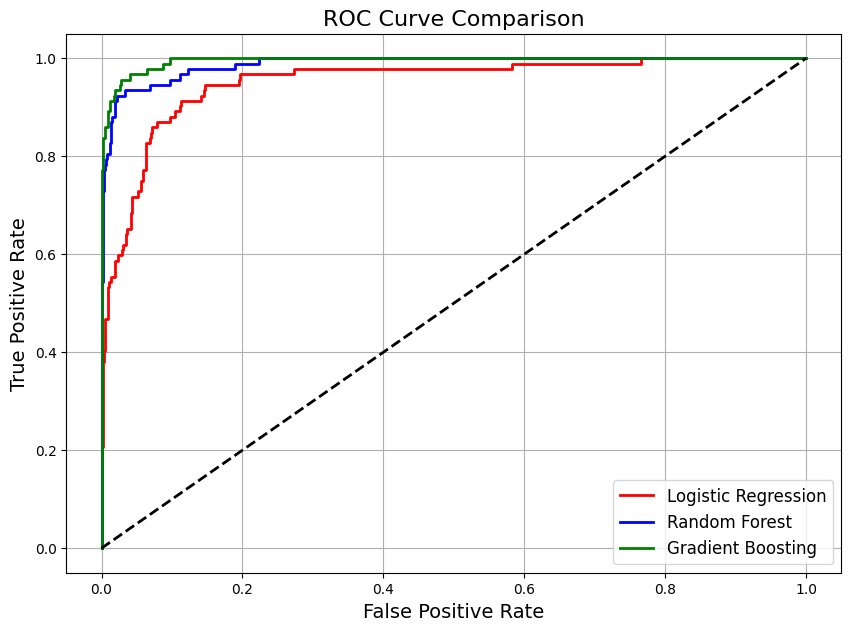

In [247]:
y_pred_logreg_proba = pipeline_logreg.predict_proba(X_test)[:, 1]  # Logistic Regression probabilities
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]  # Random Forest probabilities
y_pred_gb_proba = grid_search_gb.best_estimator_.predict_proba(X_test)[:, 1]  # Gradient Boosting probabilities
# y_pred_xgb_proba = best_xgb.predict_proba(X_test)[:, 1]  # XGBoost probabilities

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)
# roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression', color='red', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest', color='blue', linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting', color='green', linewidth=2)
# plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)

plt.show()


<font face="Times New Roman" size="4">

----
### Precision-Recall Curve:
The **Precision-Recall curve** illustrates the balance between **Precision** and **Recall** for each model. It is especially useful for imbalanced datasets where the positive class (loan customers) is smaller.

- **Gradient Boosting** (green line) achieves the highest precision across all recall values, maintaining near-perfect precision at almost every recall level. This suggests that it is very effective at correctly identifying likely loan customers while avoiding false positives.
- **Random Forest** (blue line) also performs well, but slightly below Gradient Boosting in terms of precision, especially at higher recall levels.
- **Logistic Regression** (red line) performs the worst, with a steep drop in precision as recall increases, showing that it suffers from more false positives, especially when trying to capture a high number of actual loan customers.

In summary, **Gradient Boosting** is the best performer when it comes to balancing precision and recall, ensuring fewer wasted efforts on unlikely customers while still capturing most potential borrowers. **Random Forest** also performs well but with slightly lower precision. **Logistic Regression** is less suitable due to its lower precision and performance trade-offs.

</font>

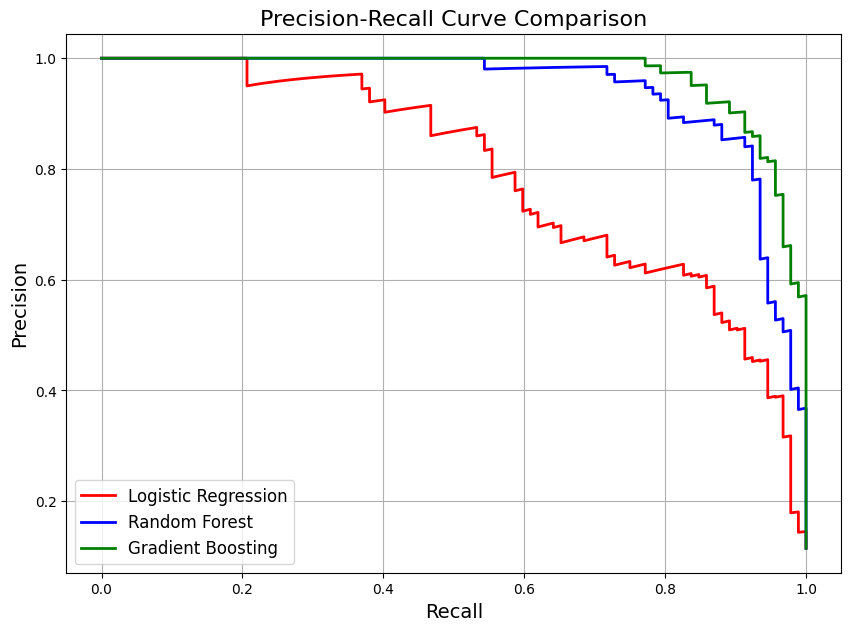

In [248]:
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_pred_logreg_proba)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf_proba)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_gb_proba)
# precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb_proba)

plt.figure(figsize=(10, 7))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression', color='red', linewidth=2)
plt.plot(recall_rf, precision_rf, label='Random Forest', color='blue', linewidth=2)
plt.plot(recall_gb, precision_gb, label='Gradient Boosting', color='green', linewidth=2)
# plt.plot(recall_xgb, precision_xgb, label='XGBoost', color='orange', linewidth=2)

plt.title('Precision-Recall Curve Comparison', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.show()


<h1 style="text-align: center; font-family: 'Times New Roman';">5. MODEL INTERPRETABILITY</h1>


<font face="Times New Roman" size="4">

**Model interpretability** is crucial for understanding how machine learning models make predictions, especially for complex models like **Random Forest** and **Gradient Boosting**, which are often considered black boxes due to their internal complexity. These models combine multiple decision trees and involve intricate interactions between features, making it difficult to directly interpret how specific inputs affect predictions. However, understanding how a model reaches its decisions is important for several reasons:

1. **Trust and Transparency**: For real-world applications, particularly in domains like finance (e.g., predicting loan approval), it is essential for decision-makers to understand why a particular prediction was made. This can help increase trust in the model's decisions.
   
2. **Regulatory Compliance**: In industries especially in banking, there are legal requirements to provide explanations for automated decisions: interpretability helps meet these requirements.

3. **Feature Importance**: Model interpretability provides insights into which features are most influential in driving the model's predictions. This is useful for refining the model and improving decision-making strategies.


### SHAP Values

One of the most widely used techniques for interpreting complex models like **Random Forest** and **Gradient Boosting** is the use of **SHAP (SHapley Additive exPlanations)** values. SHAP values offer a unified framework for explaining model predictions by calculating the contribution of each feature to the final prediction.

SHAP values are beneficial for several reasons:

1. **Local Interpretability**: SHAP values allow you to interpret individual predictions. For example, you can understand why the model predicted that a specific customer is likely to take out a loan by examining how each feature (e.g., income, credit score) contributed to the model’s decision.

2. **Global Interpretability**: By averaging SHAP values across many predictions, you can understand the overall importance of each feature. This helps identify which features most influence the model’s behavior across the entire dataset.

3. **Feature Contributions**: SHAP values break down how much each feature increases or decreases the model’s output. For instance, if the model predicts that a customer is likely to take out a loan, SHAP values explain how much each feature (e.g., income, loan history) contributed to that positive prediction.

---



<font face="Times New Roman" size="4">

### SHAP Values for Random Forest

SHAP values shape: (8,)
[-0.0025374  -0.01049319 -0.26182617 -0.06133404 -0.12759238]


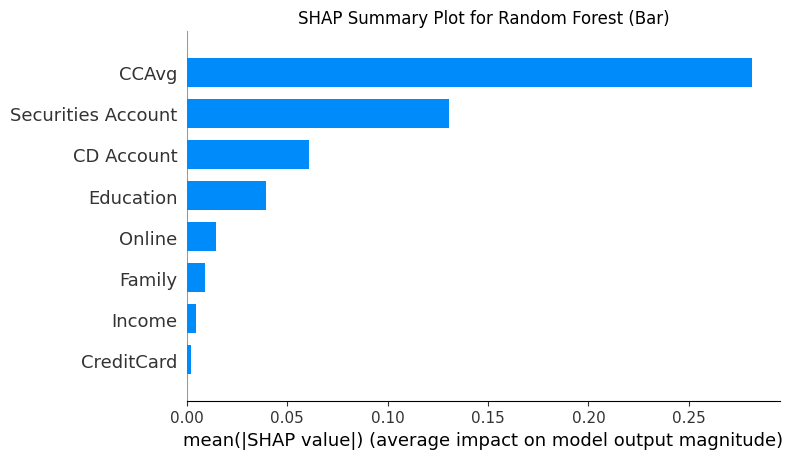

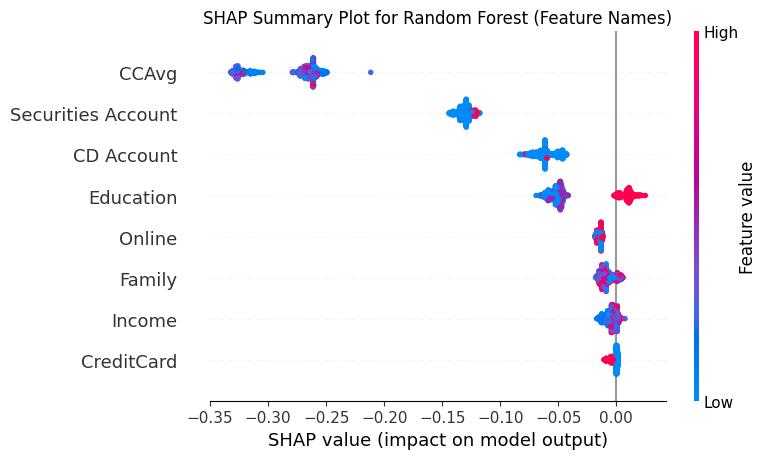

In [249]:
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_test_selected, check_additivity=False)

if isinstance(shap_values_rf, list):
    shap_values_rf_positive_class = shap_values_rf[1]
else:
    shap_values_rf_positive_class = shap_values_rf

shap_values_rf_positive_class = shap_values_rf_positive_class[:, :, 1]
print(f"SHAP values shape: {shap_values_rf_positive_class[1].shape}")
print(shap_values_rf_positive_class[1][:5])

plt.title("SHAP Summary Plot for Random Forest (Bar)")
shap.summary_plot(shap_values_rf_positive_class, X_test_selected, plot_type="bar")
plt.show()

plt.title("SHAP Summary Plot for Random Forest (Feature Names)")
shap.summary_plot(shap_values_rf_positive_class, X_test_selected, feature_names=X_test_selected.columns)
plt.show()

<font face="Times New Roman" size="4">
CCAvg demonstrates the greatest variability in its SHAP values, with both high and low values influencing the predictions.
Furthermore, notable variation is evident in the Securities and CD Accounts.
The variability of features such as Family and Credit Card is limited, reflecting their minimal role in the predictions.

<font face="Times New Roman" size="4">

---
### SHAP Values for Gradient Boosting

SHAP values shape: (13,)
[-0.22545784  0.05711378 -3.03864156  1.03131828  2.84031097]


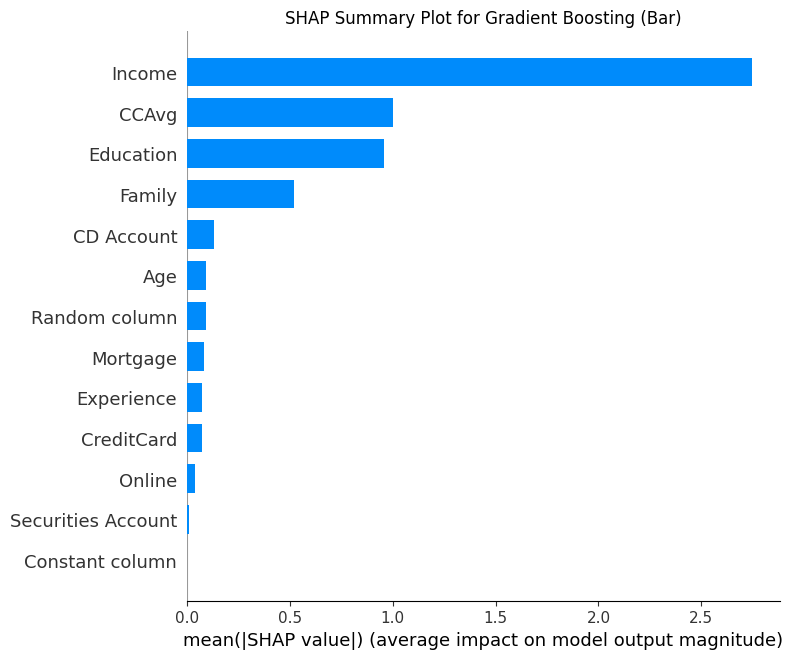

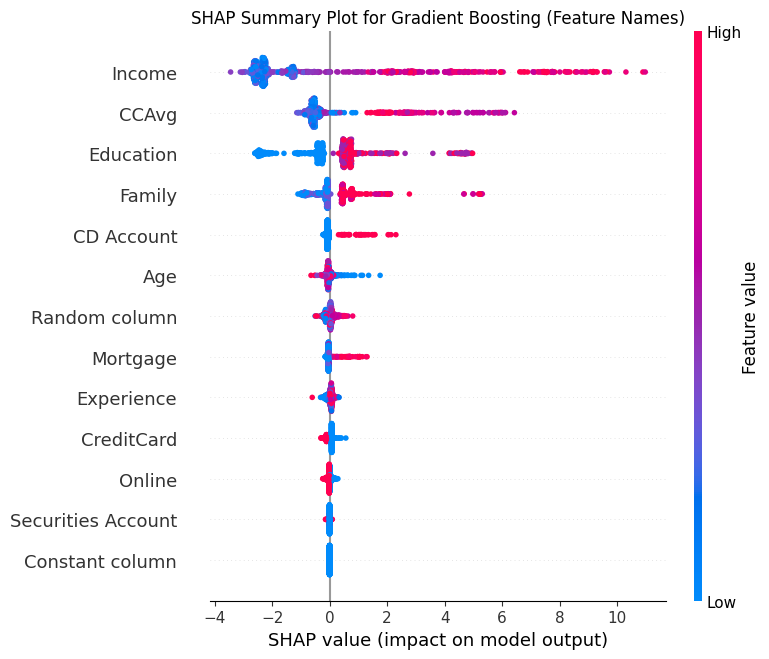

In [250]:
explainer_gb = shap.TreeExplainer(best_gb)
shap_values_gb = explainer_gb.shap_values(X_test)


if isinstance(shap_values_gb, list):
    shap_values_gb = shap_values_gb[1] 

print(f"SHAP values shape: {shap_values_gb[1].shape}")
print(shap_values_gb[1][:5])

plt.title("SHAP Summary Plot for Gradient Boosting (Bar)")
shap.summary_plot(shap_values_gb, X_test, plot_type="bar")
plt.show()

plt.title("SHAP Summary Plot for Gradient Boosting (Feature Names)")
shap.summary_plot(shap_values_gb, X_test, feature_names=X_test.columns)  
plt.show()

<h1 style="text-align: center; font-family: 'Times New Roman';">6. PREDICTIONS ON UNSEEN DATA</h1>


<font face="Times New Roman" size="4">

---
### Load new data (September)

In this step, we load the new, unseen data for the month of September. We will use this data to make predictions using the best model selected during training and testing.

In [251]:
validation_data = pd.read_csv("data/validation_data.csv")
validation_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Date,Constant column,Random column
0,64,39,23,3,0.5,1,0,1,0,0,0,2023-09-09,100,0.917257
1,33,9,184,2,4.8,2,0,0,0,0,0,2023-09-21,100,0.741792
2,58,33,22,3,0.2,1,0,0,0,1,0,2023-09-02,100,0.620880
3,54,24,61,4,2.0,3,0,1,0,1,0,2023-09-14,100,0.845258
4,55,29,49,2,0.8,3,220,0,0,0,1,2023-09-29,100,0.628842


In [252]:
validation_data.drop(['Date'], axis=1, inplace= True)

<font face="Times New Roman" size="4">

---
### Make predictions using best model 

In [266]:
# predictions = best_gb.predict_proba(validation_data)
predictions = best_gb.predict(validation_data)


In [267]:
validation_data['Predicted Personal Loan'] = predictions
validation_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Constant column,Random column,Predicted Personal Loan
0,64,39,23,3,0.5,1,0,1,0,0,0,100,0.917257,0
1,33,9,184,2,4.8,2,0,0,0,0,0,100,0.741792,1
2,58,33,22,3,0.2,1,0,0,0,1,0,100,0.620880,0
3,54,24,61,4,2.0,3,0,1,0,1,0,100,0.845258,0
4,55,29,49,2,0.8,3,220,0,0,0,1,100,0.628842,0
